# Import Packages or Libarries will be use

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset from CSV

In [8]:
df = pd.read_csv("housing_price_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [9]:
# Inspect the columns
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [10]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


## Visualize the distribution

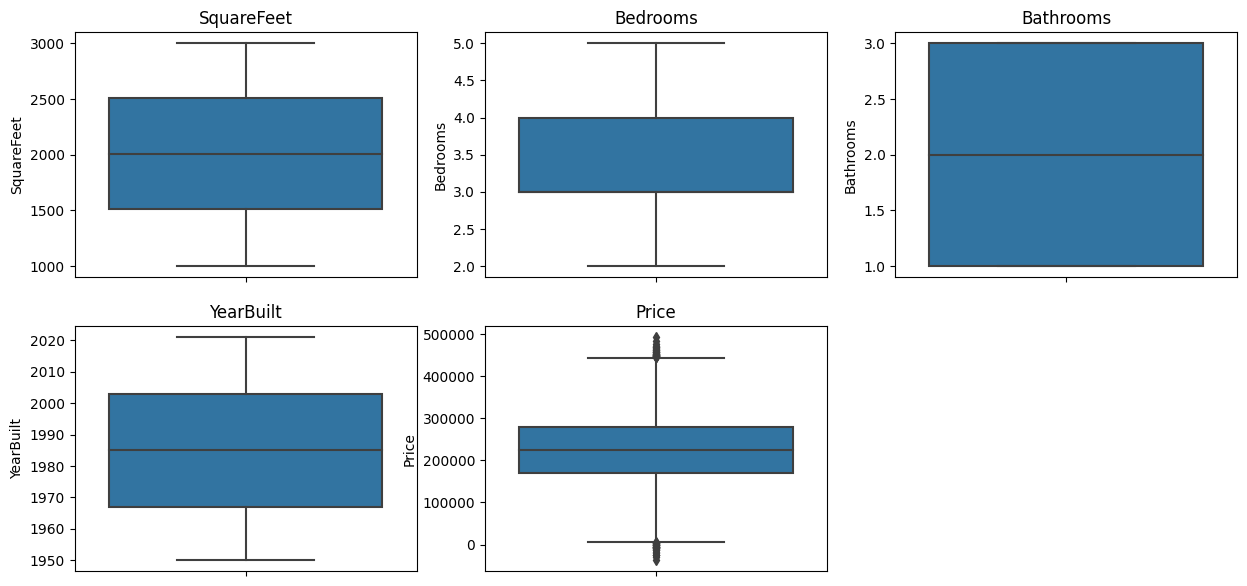

In [11]:
# Get the numerical columns
numeric = df.select_dtypes(['int64', 'float64']).columns

# Create figure
plt.figure(figsize=(15, 7))
for column in range(len(numeric)):
    plt.subplot(2, 3, column+1)
    plt.title(numeric[column])
    sns.boxplot(data=df, y=numeric[column])


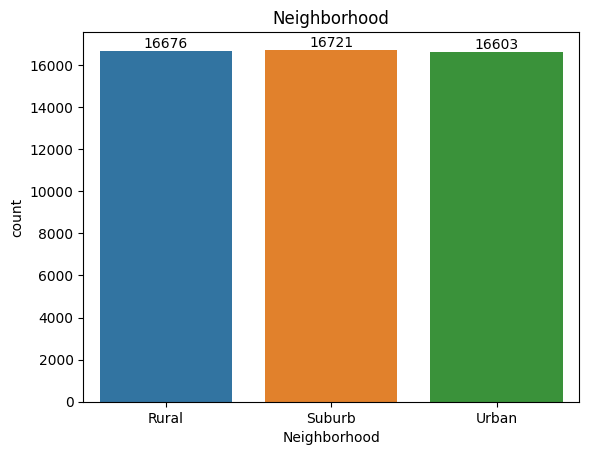

In [12]:
# Get the categorical columns
categoric = df.select_dtypes(['object']).columns

# Create figure
for column in range(len(categoric)):
    plt.title(categoric[column])
    ax = sns.countplot(data=df, x=categoric[column])
    for container in ax.containers:
        ax.bar_label(container)


C:\Users\Anan\AppData\Local\Temp\ipykernel_20020\2772654976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.iloc[:, :-1].corr()


<Axes: >

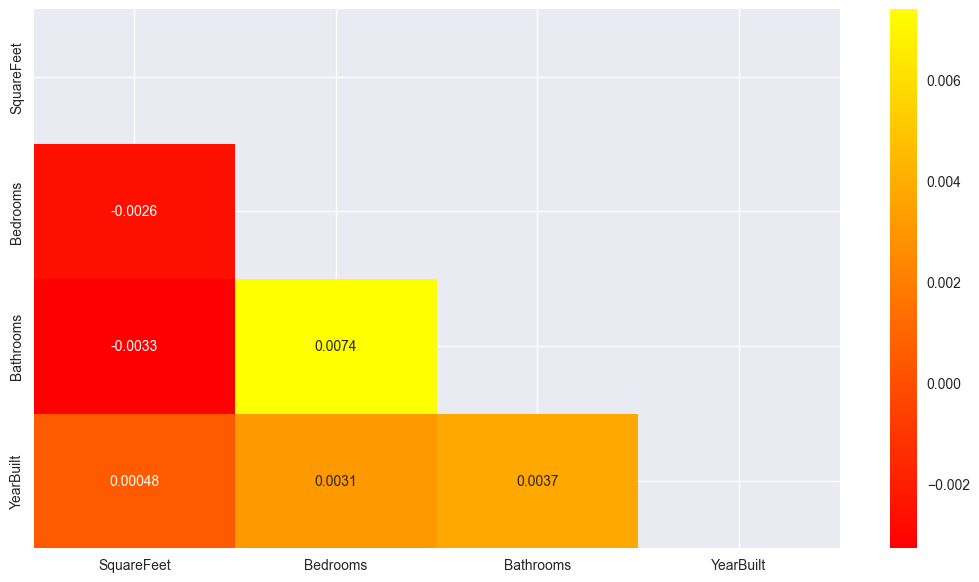

In [13]:
correlation = df.iloc[:, :-1].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (13, 7)
sns.heatmap(correlation, mask=mask, cmap='autumn', annot=True)


## Encoding Categorical Columns

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df.Neighborhood = encoder.fit_transform(df.Neighborhood)
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


## Drop outlier

In [15]:
def drop_outlier(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    filtered_data.reset_index(inplace=True, drop=True)
    return filtered_data

df = drop_outlier('Price')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49941 entries, 0 to 49940
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    49941 non-null  int64  
 1   Bedrooms      49941 non-null  int64  
 2   Bathrooms     49941 non-null  int64  
 3   Neighborhood  49941 non-null  int32  
 4   YearBuilt     49941 non-null  int64  
 5   Price         49941 non-null  float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 2.1 MB
None


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


## Split Data (Data Train and Data Validation)

In [16]:
from sklearn.model_selection import train_test_split

# Split between features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(39952, 9989)

## Build model with Ensemble Learning

In [17]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
param_grid = {
    'n_estimators':[100, 150, 200],
    'max_depth':[10, 15, 20, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4]   
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid , n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]})

In [18]:
base_model = RandomForestRegressor(**grid_search.best_params_)
bagging = BaggingRegressor(estimator=base_model, n_estimators=30, random_state=42, n_jobs=-1)
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                 min_samples_leaf=4,
                                                 min_samples_split=10,
                                                 n_estimators=150),
                 n_estimators=30, n_jobs=-1, random_state=42)

## Evaluate the Model


MAE yakni 39982.89037219165


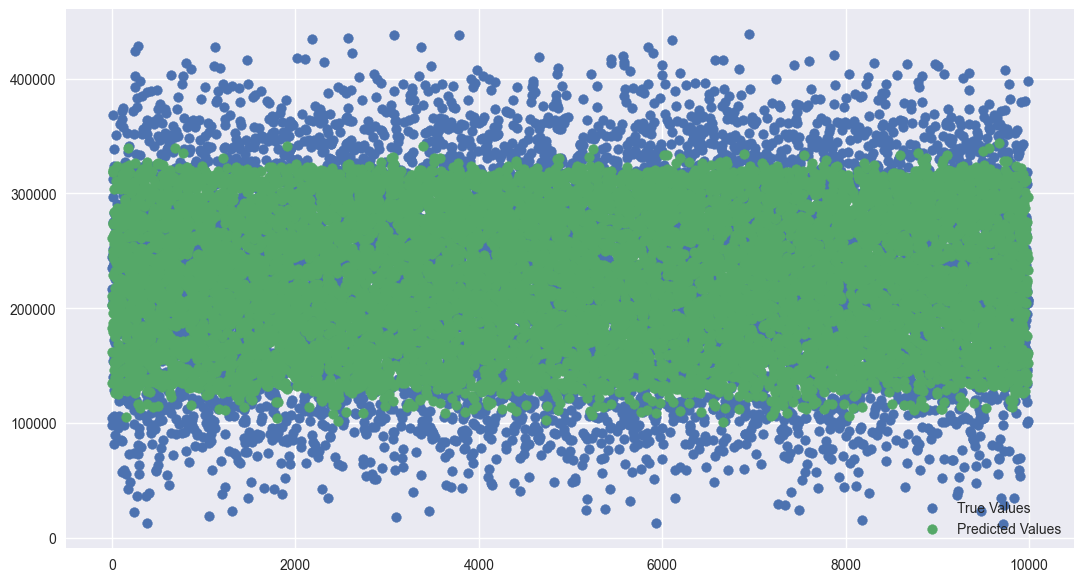

In [19]:
from sklearn.metrics import mean_absolute_error
y_pred = bagging.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE yakni {mae}")

plt.scatter(range(len(y_test)), y_test, label="True Values")
plt.scatter(range(len(y_test)), y_pred, label="Predicted Values")
plt.legend(loc='lower right')
plt.show()

In [35]:
avg = y_test.sum()/y_test.shape[0]
print(f'The average of actual y is {avg:.2f}')
print(f'The MAE is {mae:.2f}')
print(f'So, the prediction could be higher than the actual value')
print(f"Let's use average as an example actual value, so highest prize could be {avg+mae:.2f}")
print(f"And the lowest prize could be {avg-mae:.2f}")

The average of actual y is 226072.81
The MAE is 39982.89
So, the prediction could be higher than the actual value
Let's use average as an example actual value, so highest prize could be 266055.70
And the lowest prize could be 186089.92
